In [22]:
from ultralytics import YOLO

model = YOLO('yolov5s.pt')  # This will auto-download if not cached
results = model('https://ultralytics.com/images/bus.jpg')
results[0].show()


PRO TIP  Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 c:\github projects\GauravJha_Phase2_Assignment_TechAtPlay\Task1_DetectionSummary\bus.jpg: 640x480 4 persons, 1 bus, 173.5ms
Speed: 3.3ms preprocess, 173.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


In [23]:
import cv2
import json
import os
import matplotlib.pyplot as plt
from collections import Counter
from ultralytics import YOLO

# Load YOLOv5 model (pretrained)
model = YOLO('yolov5s.pt')


PRO TIP  Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



In [24]:
video_path = 'video.mp4'
cap = cv2.VideoCapture(video_path)

frame_interval = 5
frame_number = 0
results_json = []

while True:
    ret, frame = cap.read()
    if not ret:
        break

    if frame_number % frame_interval == 0:
        # Convert frame to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Run detection
        results = model(frame_rgb)[0]

        # Save detection info
        frame_data = {
            'frame': frame_number,
            'objects': []
        }

        for box in results.boxes:
            cls_id = int(box.cls[0])
            label = model.names[cls_id]
            conf = float(box.conf[0])
            x1, y1, x2, y2 = map(int, box.xyxy[0])

            frame_data['objects'].append({
                'label': label,
                'confidence': round(conf, 2),
                'bbox': [x1, y1, x2, y2]
            })

        results_json.append(frame_data)

    frame_number += 1

cap.release()
print("✅ Detection complete on every 5th frame.")



0: 384x640 17 persons, 1 backpack, 99.1ms
Speed: 2.6ms preprocess, 99.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 persons, 1 backpack, 92.3ms
Speed: 2.5ms preprocess, 92.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 persons, 1 backpack, 92.4ms
Speed: 1.6ms preprocess, 92.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 persons, 109.5ms
Speed: 2.2ms preprocess, 109.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 persons, 98.1ms
Speed: 2.4ms preprocess, 98.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 persons, 1 backpack, 129.1ms
Speed: 2.0ms preprocess, 129.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 persons, 1 backpack, 1 handbag, 127.8ms
Speed: 2.5ms preprocess, 127.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 persons, 2 b

In [25]:
with open('detection_results.json', 'w') as f:
    json.dump(results_json, f, indent=4)
print("📄 detection_results.json saved.")



📄 detection_results.json saved.


In [26]:
all_labels = []
diversity_scores = []

for frame_data in results_json:
    labels = [obj['label'] for obj in frame_data['objects']]
    all_labels.extend(labels)
    diversity_scores.append((frame_data['frame'], len(set(labels))))

# Count all objects
label_counts = Counter(all_labels)

# Frame with highest class diversity
most_diverse_frame = max(diversity_scores, key=lambda x: x[1])
print("🔍 Frame with max class diversity:", most_diverse_frame)
print("📦 Total object counts:", label_counts)


🔍 Frame with max class diversity: (210, 5)
📦 Total object counts: Counter({'person': 982, 'backpack': 85, 'handbag': 29, 'truck': 6, 'tie': 3, 'cup': 2, 'suitcase': 1, 'elephant': 1, 'bus': 1})


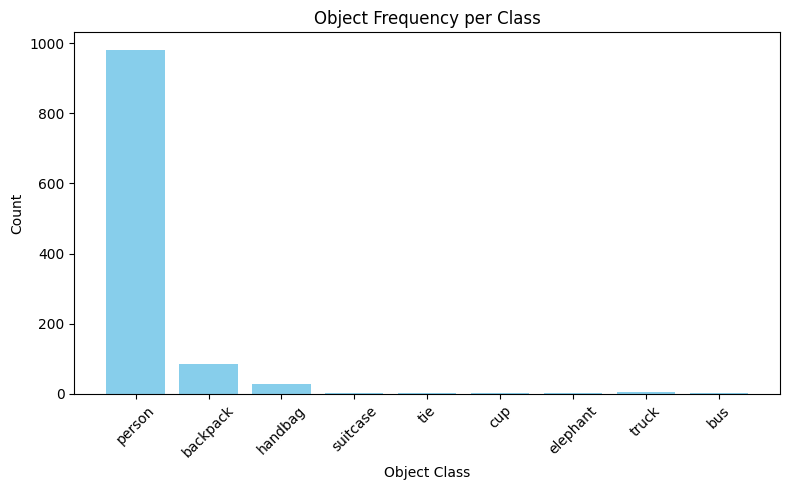

In [27]:
plt.figure(figsize=(8,5))
plt.bar(label_counts.keys(), label_counts.values(), color='skyblue')
plt.title("Object Frequency per Class")
plt.xlabel("Object Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("object_frequency_chart.png")
plt.show()


In [28]:
import os

# Create output folder if it doesn't exist
os.makedirs("annotated_frames", exist_ok=True)

cap = cv2.VideoCapture("video.mp4")
frame_number = 0
save_index = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    if frame_number % 5 == 0:
        results = model(frame)[0]
        annotated = results.plot()  # This draws boxes and labels

        # Save the frame as image
        frame_name = f"annotated_frames/frame_{frame_number}.jpg"
        cv2.imwrite(frame_name, annotated)
        save_index += 1

    frame_number += 1

cap.release()
print(f"✅ Saved {save_index} annotated frames in /annotated_frames/")



0: 384x640 15 persons, 1 backpack, 97.0ms
Speed: 1.9ms preprocess, 97.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 1 backpack, 83.8ms
Speed: 1.7ms preprocess, 83.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 1 backpack, 82.2ms
Speed: 2.6ms preprocess, 82.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 85.1ms
Speed: 1.8ms preprocess, 85.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 83.7ms
Speed: 2.4ms preprocess, 83.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 3 backpacks, 86.4ms
Speed: 2.5ms preprocess, 86.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 persons, 1 backpack, 1 handbag, 87.8ms
Speed: 2.5ms preprocess, 87.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 3 backpa